In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
fc = pd.read_csv("fuelconsumption.csv",encoding='IBM437')
fc = fc.iloc[:,0:15]
print(fc.head)

<bound method NDFrame.head of                       MODEL  \
0                      YEAR   
1                      2000   
2                      2000   
3                      2000   
4                      2000   
...                     ...   
14270                   NaN   
14271                   NaN   
14272                   NaN   
14273      Fuel Consumption   
14274  CO2 Emissions (g/km)   

                                                    MAKE  \
0                                                    NaN   
1                                                  ACURA   
2                                                  ACURA   
3                                                  ACURA   
4                                                  ACURA   
...                                                  ...   
14270                                         D = Diesel   
14271                                  E = Ethanol (E85)   
14272                                    N = Natural Gas 

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,4,8,9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
print(fc.columns)

Index(['MODEL', 'MAKE', 'MODEL.1', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'CO2 EMISSIONS ', 'Unnamed: 13', 'Unnamed: 14'],
      dtype='object')


cleaning and dropping the columns that are not needed for our analysis

In [3]:
dropping = ['Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 13','Unnamed: 14']
fc = fc.drop(dropping,axis=1)

In [4]:
print(fc['MODEL'].value_counts())

2009                       1092
2012                       1081
2008                       1079
2011                       1076
2007                       1043
2014                       1040
2010                       1021
2006                        968
2013                        926
2004                        898
2003                        820
2002                        740
2005                        700
2001                        679
2000                        639
2005                        319
2013                        132
Fuel Type                     1
Model                         1
Transmission                  1
YEAR                          1
CO2 Emissions (g/km)          1
Fuel Consumption              1
Understanding the Table       1
Name: MODEL, dtype: int64


Removing the null values and the inconsistent values from our dataset

In [5]:
newfc =fc.dropna()
print(newfc.head())

  MODEL   MAKE  MODEL.1 VEHICLE CLASS ENGINE SIZE  CYLINDERS TRANSMISSION  \
1  2000  ACURA    1.6EL       COMPACT         1.6        4.0           A4   
2  2000  ACURA    1.6EL       COMPACT         1.6        4.0           M5   
3  2000  ACURA    3.2TL      MID-SIZE         3.2        6.0          AS5   
4  2000  ACURA    3.5RL      MID-SIZE         3.5        6.0           A4   
5  2000  ACURA  INTEGRA    SUBCOMPACT         1.8        4.0           A4   

  FUEL FUEL CONSUMPTION CO2 EMISSIONS   
1    X              9.2            186  
2    X              8.5            175  
3    Z             12.2            230  
4    Z             13.4            264  
5    X             10.0            198  


In [6]:
print(newfc.tail())

      MODEL   MAKE   MODEL.1   VEHICLE CLASS ENGINE SIZE  CYLINDERS  \
14249  2014  VOLVO  XC60 AWD     SUV - SMALL           3        6.0   
14250  2014  VOLVO  XC60 AWD     SUV - SMALL         3.2        6.0   
14251  2014  VOLVO  XC70 AWD     SUV - SMALL           3        6.0   
14252  2014  VOLVO  XC70 AWD     SUV - SMALL         3.2        6.0   
14253  2014  VOLVO  XC90 AWD  SUV - STANDARD         3.2        6.0   

      TRANSMISSION FUEL FUEL CONSUMPTION CO2 EMISSIONS   
14249          AS6    X             11.9            237  
14250          AS6    X             11.7            230  
14251          AS6    X             11.9            237  
14252          AS6    X             11.4            225  
14253          AS6    X             13.3            258  


In [7]:
print(newfc.info())
newfc = newfc.astype(str)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14253 entries, 1 to 14253
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MODEL             14253 non-null  object 
 1   MAKE              14253 non-null  object 
 2   MODEL.1           14253 non-null  object 
 3   VEHICLE CLASS     14253 non-null  object 
 4   ENGINE SIZE       14253 non-null  object 
 5   CYLINDERS         14253 non-null  float64
 6   TRANSMISSION      14253 non-null  object 
 7   FUEL              14253 non-null  object 
 8   FUEL CONSUMPTION  14253 non-null  object 
 9   CO2 EMISSIONS     14253 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


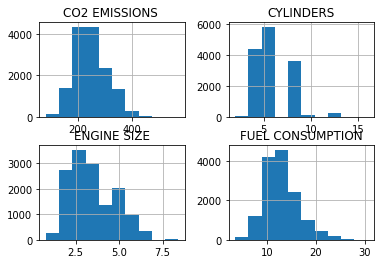

       CYLINDERS  CO2 EMISSIONS   ENGINE SIZE  FUEL CONSUMPTION
1            4.0           186.0          1.6               9.2
2            4.0           175.0          1.6               8.5
3            6.0           230.0          3.2              12.2
4            6.0           264.0          3.5              13.4
5            4.0           198.0          1.8              10.0
...          ...             ...          ...               ...
14249        6.0           237.0          3.0              11.9
14250        6.0           230.0          3.2              11.7
14251        6.0           237.0          3.0              11.9
14252        6.0           225.0          3.2              11.4
14253        6.0           258.0          3.2              13.3

[14253 rows x 4 columns]


In [8]:
two = newfc[['CYLINDERS','CO2 EMISSIONS ','ENGINE SIZE','FUEL CONSUMPTION']]
two = two.astype(float)
two.hist()
plt.show()
print(two)

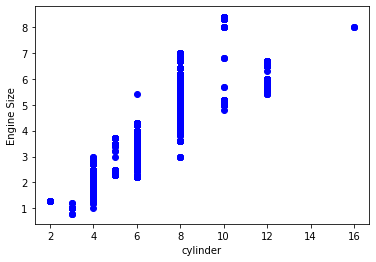

In [9]:
plt.scatter(two['CYLINDERS'],two['ENGINE SIZE'],color='blue')
plt.xlabel('cylinder')
plt.ylabel('Engine Size')
plt.show()

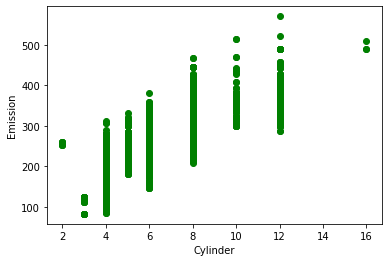

In [10]:
plt.scatter(two['CYLINDERS'],two['CO2 EMISSIONS '],color='green')
plt.xlabel('Cylinder')
plt.ylabel('Emission')
plt.show()

In [11]:
print(newfc.columns)

Index(['MODEL', 'MAKE', 'MODEL.1', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'CO2 EMISSIONS '],
      dtype='object')


In [12]:
print(newfc['FUEL CONSUMPTION'].value_counts())

12.2    277
11.7    258
11.9    238
13.1    225
12.6    219
       ... 
23.2      1
5.3       1
5.2       1
3.6       1
30.6      1
Name: FUEL CONSUMPTION, Length: 214, dtype: int64


In [13]:
nwfc = newfc[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','CO2 EMISSIONS ']]
nwfc = nwfc.astype(float)
msk = np.random.rand(len(nwfc)) < 0.8
train = nwfc[msk]
test = nwfc[~msk]


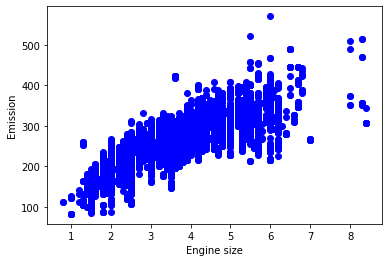

In [14]:
plt.scatter(train['ENGINE SIZE'],train['CO2 EMISSIONS '],color='blue')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINE SIZE']])
train_y = np.asanyarray(train[['CO2 EMISSIONS ']])
regr.fit(train_x,train_y)
print('coefficients:', regr.coef_)
print('intercept:', regr.intercept_)

coefficients: [[37.00170655]]
intercept: [119.94039436]


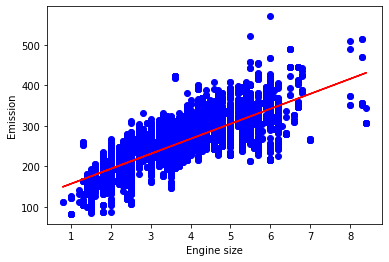

In [16]:
plt.scatter(train['ENGINE SIZE'],train['CO2 EMISSIONS '],color='blue')
plt.plot(train_x,regr.coef_[0][0]*train_x + regr.intercept_[0],'r')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()

In [17]:
from sklearn.metrics import r2_score
test_x =np.asanyarray(test[['ENGINE SIZE']])
test_y = np.asanyarray(test[['CO2 EMISSIONS ']])
test_y_hat = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of square(MSE): %.2f" % np.mean((test_y_hat - test_y)**2))
print("R2- score: %.2f" % r2_score(test_y_hat, test_y))

Mean absolute error: 25.33
Residual sum of square(MSE): 1098.93
R2- score: 0.54


In [18]:
mean_y = (sum(test_y_hat) / len(test_y_hat))
print(mean_y)

[248.46017279]


In [19]:
mean_test = (test['CO2 EMISSIONS '].mean())
print(mean_test)

249.27457152850647


In [20]:
print(mean_test - mean_y)

[0.81439874]


In [21]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUEL CONSUMPTION']])
train_y = np.asanyarray(train[['CO2 EMISSIONS ']])
regr.fit(train_x,train_y)
print('coefficients:', regr.coef_)
print('intercept:', regr.intercept_)

coefficients: [[15.20851899]]
intercept: [51.94158575]


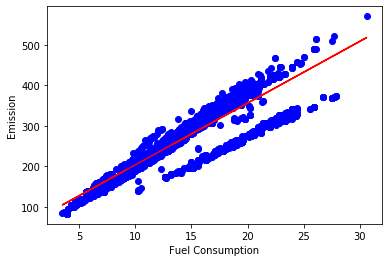

In [22]:
plt.scatter(train['FUEL CONSUMPTION'],train['CO2 EMISSIONS '],color='blue')
plt.plot(train_x,regr.coef_[0][0]*train_x + regr.intercept_[0],'r')
plt.xlabel('Fuel Consumption')
plt.ylabel('Emission')
plt.show()

In [23]:
from sklearn.metrics import r2_score
test_x =np.asanyarray(test[['FUEL CONSUMPTION']])
test_y = np.asanyarray(test[['CO2 EMISSIONS ']])
test_y_hat = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of square(MSE): %.2f" % np.mean((test_y_hat - test_y)**2))
print("R2-score: %.2f" % r2_score(test_y_hat, test_y))

Mean absolute error: 14.36
Residual sum of square(MSE): 535.82
R2-score: 0.82


In [24]:
fc_95 = pd.read_csv("fuel_consumption_1995.csv", encoding="IBM437",delimiter=',')
print(fc_95.head())

  MODEL   MAKE                 MODEL.1 VEHICLE CLASS ENGINE SIZE  CYLINDERS  \
0  YEAR    NaN  # = high output engine           NaN         (L)        NaN   
1  1995  ACURA                 INTEGRA    SUBCOMPACT         1.8        4.0   
2  1995  ACURA                 INTEGRA    SUBCOMPACT         1.8        4.0   
3  1995  ACURA            INTEGRA GS-R    SUBCOMPACT         1.8        4.0   
4  1995  ACURA                  LEGEND       COMPACT         3.2        6.0   

  TRANSMISSION  FUEL FUEL CONSUMPTION      Unnamed: 9      Unnamed: 10  \
0          NaN  TYPE  CITY (L/100 km)  HWY (L/100 km)  COMB (L/100 km)   
1           A4     X             10.2             7.0              8.8   
2           M5     X              9.6             7.0              8.4   
3           M5     Z              9.4             7.0              8.3   
4           A4     Z             12.6             8.9             10.9   

  Unnamed: 11 CO2 EMISSIONS   
0  COMB (mpg)         (g/km)  
1          32     

In [25]:
print(fc_95.columns)

Index(['MODEL', 'MAKE', 'MODEL.1', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'CO2 EMISSIONS '],
      dtype='object')


In [26]:
fc_ =fc_95[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','CO2 EMISSIONS ']]
print(fc_.head(10))

  ENGINE SIZE  CYLINDERS FUEL CONSUMPTION CO2 EMISSIONS 
0         (L)        NaN  CITY (L/100 km)         (g/km)
1         1.8        4.0             10.2            202
2         1.8        4.0              9.6            193
3         1.8        4.0              9.4            191
4         3.2        6.0             12.6            251
5         3.2        6.0             13.0            260
6         3.2        6.0             13.4            258
7         3.0        6.0             13.5            267
8         3.0        6.0             12.9            255
9         3.0        6.0             15.7            301


In [27]:
fc_ = fc_.dropna()

print(fc_)


     ENGINE SIZE  CYLINDERS FUEL CONSUMPTION CO2 EMISSIONS 
1            1.8        4.0             10.2            202
2            1.8        4.0              9.6            193
3            1.8        4.0              9.4            191
4            3.2        6.0             12.6            251
5            3.2        6.0             13.0            260
...          ...        ...              ...            ...
3515         2.3        5.0             11.9            232
3516         2.3        5.0             11.9            232
3517         2.4        5.0             11.6            225
3518         2.4        5.0             11.2            221
3519         2.3        5.0             12.9            255

[3519 rows x 4 columns]


In [28]:
fc_ = fc_.astype(float)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0420F1848>,
      dtype=object)

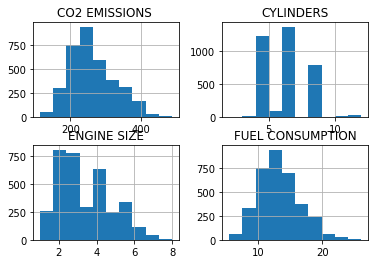

In [29]:
fc_.hist()

In [30]:
text_x = np.asanyarray(fc_[['FUEL CONSUMPTION']])
text_y = np.asanyarray([['CO2 EMISSIONS ']])
text_y_hat = regr.predict(text_x)
print(text_y_hat[0:5])

[[207.06847949]
 [197.94336809]
 [194.9016643 ]
 [243.56892508]
 [249.65233267]]


- Prediction of the CO2 gas emission using fuel consumption gives a more accurate result of 82% r2-score compare to engine size which gives a r2-score of 54%.